In [ ]:
!pip install autokeras

     |████████████████████████████████| 174kB 8.5MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=db9a60282d06c0aef733bd06396efd67283026e5bc3eab2a79acdebb1df4e339
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=d4b4b03f0253a33aa43257a6b5be01e5b8aa7063d9cb8036744b0fb02d6bdd64
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available:  1


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4]


In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# Initialize the image classifier.
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# Feed the image classifier with training data.
history = clf.fit(x_train, y_train)

Trial 1 Complete [00h 02m 09s]
val_loss: 0.040986694395542145

Best val_loss So Far: 0.040986694395542145
Total elapsed time: 00h 02m 09s
INFO:tensorflow:Oracle triggered exit
Epoch 1/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3040 - accuracy: 0.9061
Epoch 2/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0791 - accuracy: 0.9759
Epoch 3/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0627 - accuracy: 0.9801
Epoch 4/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9832
Epoch 5/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9854
Epoch 6/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0406 - accuracy: 0.9871
Epoch 7/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 8/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0331 - accuracy: 0.9895
Epoch 9/9
1875/1

In [ ]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0     

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

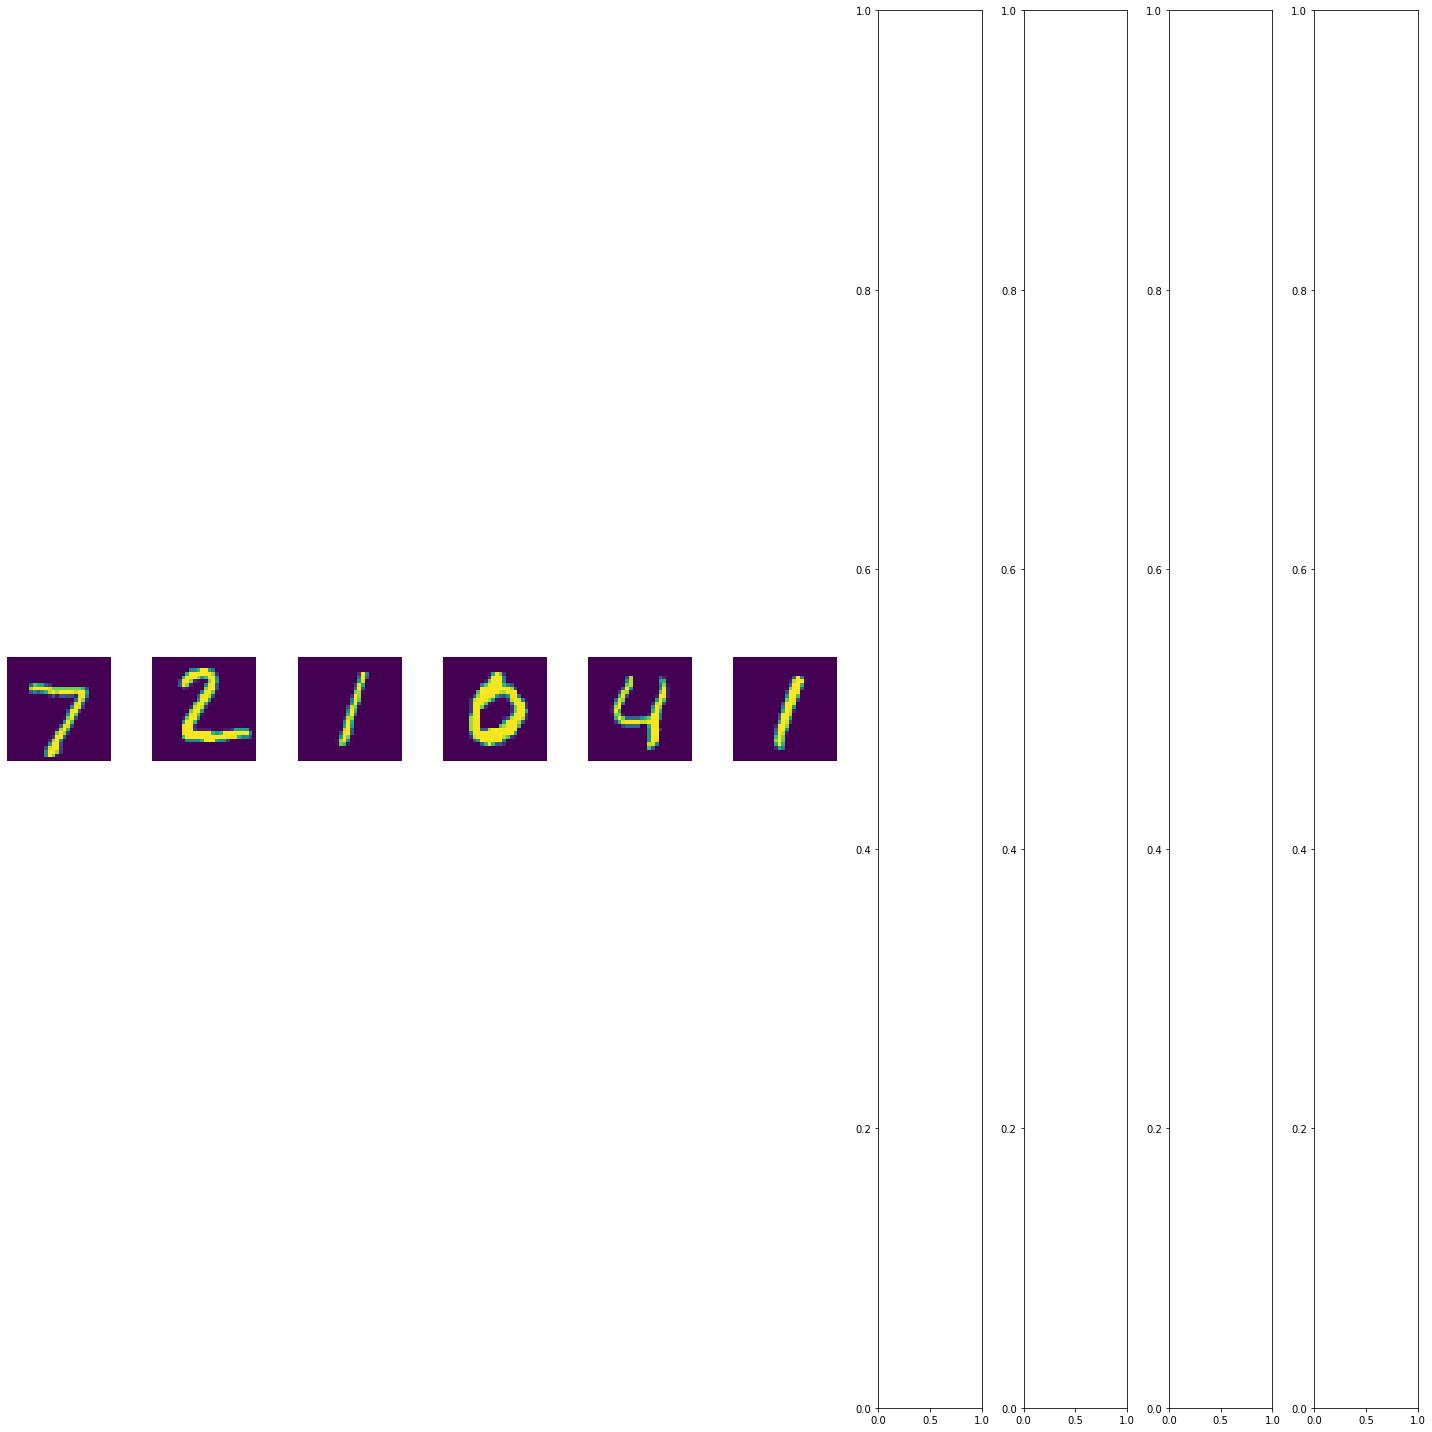

In [ ]:
plotImages(x_test[:6])

In [ ]:
# Predict with the best model.
predicted_y = clf.predict(x_test[:6])
print(predicted_y)

[['7']
 ['2']
 ['1']
 ['0']
 ['4']
 ['1']]


In [ ]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9889
[0.037700191140174866, 0.9889000058174133]
